In [38]:
import pandas as pd
from pathlib import Path
%matplotlib inline
import matplotlib.pyplot as plt
import panel as pn
from panel.interact import interact
pn.extension("plotly")
import numpy as np
import seaborn as sns
from MCForecastTools import MCSimulation
from dotenv import load_dotenv
import os
import plotly.express as px
from PIL import Image
import requests
from io import BytesIO

import warnings
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

In [2]:
Kenya_path = Path('kenyausd final.csv')
Russia_path = Path('russiausd final.csv')
Singapore_path = Path('singaporeusd final.csv')
Ukraine_path = Path('ukraineusd final.csv')
Venezuela_path = Path('venusd final.csv')

In [3]:
Kenya = pd.read_csv(Kenya_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
Russia= pd.read_csv(Russia_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
Singapore = pd.read_csv(Singapore_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
Ukraine = pd.read_csv(Ukraine_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
Venezuela = pd.read_csv(Venezuela_path, index_col='Date', parse_dates=True, infer_datetime_format=True)

In [4]:
btc=pd.read_csv("BITSTAMP_BTCUSD, 1D.csv", index_col="time", infer_datetime_format=True, parse_dates=True)
eth=pd.read_csv("COINBASE_ETHUSD, 1D.csv", index_col="time", infer_datetime_format=True, parse_dates=True)
ltc=pd.read_csv("COINBASE_LTCUSD, 1D.csv", index_col="time", infer_datetime_format=True, parse_dates=True)
dash=pd.read_csv("KRAKEN_DASHUSD, 1D.csv", index_col="time", infer_datetime_format=True, parse_dates=True)
xmr=pd.read_csv("KRAKEN_XMRUSD, 1D.csv", index_col="time", infer_datetime_format=True, parse_dates=True)
sp500= pd.read_csv("SP_SPX, 1D.csv", index_col="time", infer_datetime_format=True, parse_dates=True)
dollar = pd.read_csv("TVC_DXY, 1D.csv", index_col="time", infer_datetime_format=True, parse_dates=True)

In [5]:
btc = btc.drop(columns=["Plot", "Plot.1", "Plot.2", "Plot.3", "Plot.4", "Plot.5", "Plot.6", "Plot.7", "Jaw", "Teeth", "Lips", "RSI",'open', 'high', 'low'])
eth = eth.drop(columns=["Plot", "Plot.1", "Plot.2", "Plot.3", "Plot.4", "Plot.5", "Plot.6", "Plot.7", "Jaw", "Teeth", "Lips", "RSI",'open', 'high', 'low'])
ltc = ltc.drop(columns=["Plot", "Plot.1", "Plot.2", "Plot.3", "Plot.4", "Plot.5", "Plot.6", "Plot.7", "Jaw", "Teeth", "Lips", "RSI",'open', 'high', 'low'])
dash = dash.drop(columns=["Plot", "Plot.1", "Plot.2", "Plot.3", "Plot.4", "Plot.5", "Plot.6", "Plot.7", "Jaw", "Teeth", "Lips", "RSI",'open', 'high', 'low'])
xmr = xmr.drop(columns=["Plot", "Plot.1", "Plot.2", "Plot.3", "Plot.4", "Plot.5", "Plot.6", "Plot.7", "Jaw", "Teeth", "Lips", "RSI",'open', 'high', 'low'])
sp500 = sp500.drop(columns=["Plot", "Plot.1", "Plot.2", "Plot.3", "Plot.4", "Plot.5", "Plot.6", "Plot.7", "Jaw", "Teeth", "Lips", "RSI",'open', 'high', 'low'])
dollar = dollar.drop(columns=["Plot", "Plot.1", "Plot.2", "Plot.3", "Plot.4", "Plot.5", "Plot.6", "Plot.7", "Jaw", "Teeth", "Lips", "RSI",'open', 'high', 'low'])

In [6]:
crypto_all_no_dates = pd.concat([btc, eth, ltc, dash, xmr], axis=1, keys=["BTC", "ETH", "LTC", "DASH", "XMR"])

In [7]:
crypto_all = crypto_all_no_dates[~(crypto_all_no_dates.index < '2017-04-21')]
crypto_all.index = crypto_all.index.date
crypto_all = crypto_all.reset_index()
crypto_all = crypto_all.groupby(['index']).sum()
crypto_all = crypto_all.replace(0, np.nan)
crypto_all = crypto_all.dropna()
crypto_all.index.names = ['Date']


sp500 = sp500[~(sp500.index < '2017-04-21')]
sp500.index = sp500.index.date
sp500.index.names = ['Date']

dollar = dollar[~(dollar.index < '2017-04-21')]
dollar.index = dollar.index.date
dollar.index.names = ['Date']

crypto_all

,BTC,ETH,LTC,DASH,XMR
,close,close,close,close,close
Date,,,,,
2017-04-21,1233.20,48.61,14.35,71.10240,20.01387
2017-04-22,1241.99,48.96,15.38,71.02448,20.02333
2017-04-23,1253.58,50.12,15.07,72.30000,19.58344
2017-04-24,1269.00,50.31,15.53,72.09146,19.60000
2017-04-25,1287.99,53.42,15.09,72.10000,19.50000
...,...,...,...,...,...
2022-04-17,40814.60,3056.19,111.24,108.72000,265.87000
2022-04-18,41505.77,3102.26,113.81,109.59700,254.39000


In [8]:
concat = pd.concat([Kenya, Russia, Singapore, Ukraine, Venezuela], axis=1, keys=["KES", "RUB", "SGD", "UAH", "VES"])
Countries_currencies = concat[~(concat.index < '2017-04-21')] 
Countries_currencies = Countries_currencies.dropna()
Countries_currencies

,KES,RUB,SGD,UAH,VES
,close,close,close,close,close
Date,,,,,
2017-04-24,0.0097,0.017911,0.71794,0.03761,0.10015
2017-04-25,0.0095,0.017809,0.71724,0.03717,0.10015
2017-04-26,0.0095,0.017497,0.71622,0.03730,0.10015
2017-04-27,0.0095,0.017540,0.71553,0.03728,0.10015
2017-04-28,0.0095,0.017561,0.71560,0.03721,0.10015
...,...,...,...,...,...
2022-04-14,0.0086,0.012137,0.73687,0.03393,0.22564
2022-04-18,0.0086,0.012388,0.73341,0.03379,0.22529


In [9]:
# Picking smaller stocks
small_monte_foreign = Countries_currencies[["KES", "UAH", "VES"]]

# Configure a Monte Carlo simulation to forecast 5 year of returns using BTC, ETH, and DASH
MC_small_foreign = MCSimulation(
    portfolio_data = small_monte_foreign,
    weights = [.33, .33, .33],
    num_simulation = 1000,
    num_trading_days = 252*5
)

# Print the simulatino input data
MC_small_foreign.portfolio_data.head()

KES                   UAH                   VES             
             close daily_return    close daily_return    close daily_return
Date                                                                       
2017-04-24  0.0097          NaN  0.03761          NaN  0.10015          NaN
2017-04-25  0.0095    -0.020619  0.03717    -0.011699  0.10015          0.0
2017-04-26  0.0095     0.000000  0.03730     0.003497  0.10015          0.0
2017-04-27  0.0095     0.000000  0.03728    -0.000536  0.10015          0.0
2017-04-28  0.0095     0.000000  0.03721    -0.001878  0.10015          0.0

In [10]:
# Run a Monte Carlo Simulation to show five years of returns
MC_small_foreign.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997439,1.000501,0.999482,1.001910,1.004407,1.002610,1.002462,1.000262,1.001680,1.002477,...,0.998015,1.002659,1.000604,0.996161,0.998625,0.998825,1.000344,0.995707,1.003731,0.995857
2,0.998466,1.001771,1.001418,1.000589,0.999870,1.001892,1.002301,0.997789,1.002520,1.004488,...,0.997226,1.002608,1.001264,0.994080,0.997832,1.002313,1.001091,0.997759,1.003350,0.993676
3,0.996583,1.002553,0.998880,0.997678,1.001252,0.998678,0.998769,0.995621,1.002247,1.005929,...,0.998625,1.005130,1.003658,0.995721,0.998438,0.998320,1.003474,0.995654,1.004560,0.992225
4,0.995674,1.001590,0.997842,0.998058,0.999819,0.997858,1.001481,0.991955,0.999419,1.007348,...,0.997979,1.003714,1.001571,0.995657,0.998382,1.000575,0.998692,0.992325,1.009855,0.990538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,0.935352,0.917091,0.994670,0.908567,0.825633,0.905337,0.861756,0.902270,0.927523,0.973451,...,0.998921,1.057617,0.855380,1.032188,0.786408,0.889459,0.859412,0.959407,1.068249,0.841128
1257,0.936537,0.919088,0.996602,0.911636,0.823254,0.905844,0.862236,0.902342,0.927769,0.974319,...,0.998932,1.058906,0.852636,1.031405,0.786459,0.888847,0.857832,0.960146,1.065134,0.839211
1258,0.935654,0.918925,1.000141,0.911827,0.821651,0.909769,0.860713,0.902593,0.928313,0.973460,...,0.998288,1.059959,0.852198,1.028353,0.785548,0.889687,0.857288,0.956758,1.061901,0.842269
1259,0.934590,0.919544,0.998761,0.910579,0.826891,0.907051,0.858798,0.900721,0.931444,0.975648,...,0.996967,1.060658,0.853457,1.026066,0.786077,0.887503,0.857347,0.957790,1.055804,0.843185


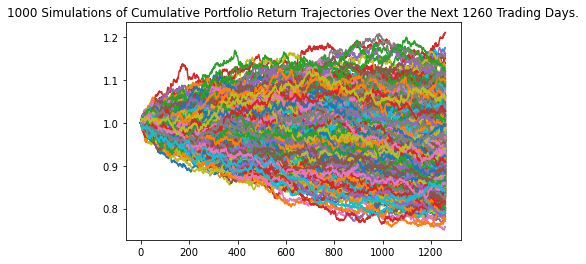

In [11]:
# Simulation outcomes
line_plot_foreign = MC_small_foreign.plot_simulation()

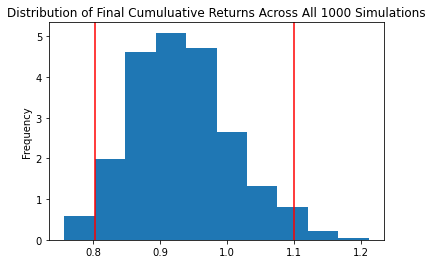

In [12]:
# Probability distribution
dist_plot_foreign = MC_small_foreign.plot_distribution()

In [66]:
# Fetch sumary statistics
foreign_summ = MC_small_foreign.summarize_cumulative_return()
print(foreign_summ)

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in stocks
even_ci_lower = round(foreign_summ[8]*10000,2)
even_ci_upper = round(foreign_summ[9]*10000,2)

# Print results
output_foreign_msg = f"There is a 95% chance that an initial investment of $10,000 in a portfolio of these foreign currencies over the next 5 years will end within in the range of ${even_ci_lower} and ${even_ci_upper}."
output_foreign_msg 

count           1000.000000
mean               0.933784
std                0.074885
min                0.757030
25%                0.880073
50%                0.927339
75%                0.977299
max                1.210994
95% CI Lower       0.802094
95% CI Upper       1.099579
Name: 1260, dtype: float64


'There is a 95% chance that an initial investment of $10,000 in a portfolio of these foreign currencies over the next 5 years will end within in the range of $8020.94 and $10995.79.'

In [14]:
# Picking smaller stocks
small_monte = crypto_all[["LTC", "DASH", "XMR"]]

# Configure a Monte Carlo simulation to forecast 5 year of returns using BTC, ETH, and DASH
MC_small = MCSimulation(
    portfolio_data = small_monte,
    weights = [.33, .33, .33],
    num_simulation = 1000,
    num_trading_days = 252*5
)

# Print the simulatino input data
MC_small.portfolio_data.head()

LTC                   DASH                    XMR             
            close daily_return     close daily_return     close daily_return
Date                                                                        
2017-04-21  14.35          NaN  71.10240          NaN  20.01387          NaN
2017-04-22  15.38     0.071777  71.02448    -0.001096  20.02333     0.000473
2017-04-23  15.07    -0.020156  72.30000     0.017959  19.58344    -0.021969
2017-04-24  15.53     0.030524  72.09146    -0.002884  19.60000     0.000846
2017-04-25  15.09    -0.028332  72.10000     0.000118  19.50000    -0.005102

In [15]:
# Run a Monte Carlo Simulation to show five years of returns
MC_small.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.988898,0.980129,0.994036,0.986982,1.022152,0.959089,1.036520,0.993175,1.060732,1.058359,...,0.984571,1.041377,0.980855,1.012524,0.967291,0.899902,0.969598,1.009386,0.972086,0.987677
2,1.049904,0.992335,1.049673,0.958665,0.972619,0.919344,1.108616,1.015101,1.040228,1.029448,...,0.949910,1.063744,1.023798,0.975600,1.024217,0.903384,1.001582,1.075503,0.965602,0.978077
3,1.016585,1.059042,1.007679,0.934158,1.017132,0.919265,1.181712,1.021175,1.068278,1.003382,...,0.960840,1.077829,1.061232,0.998244,1.045678,0.966362,1.018377,1.064863,1.012332,0.959964
4,1.038815,1.069366,0.933244,0.924022,1.019004,0.975232,1.176795,1.060905,1.065346,1.070201,...,1.012649,1.077101,1.103644,1.012471,1.009122,0.959524,1.003004,1.086700,1.007452,0.951134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.631832,20.629920,64.589451,11.525955,34.572747,34.778505,11.064417,3.122089,12.555806,37.284696,...,1.818020,53.449396,6.156495,3.113584,9.971561,70.610965,14.430670,17.136837,30.051409,7.498468
1257,2.608078,21.383854,63.661309,11.654618,36.870084,34.108761,11.620746,3.090475,12.897013,39.093348,...,1.716531,53.432543,6.308831,2.962118,9.792511,71.938290,14.355748,16.870643,31.111195,7.420116
1258,2.654716,21.609928,64.442891,11.991322,38.076347,35.937388,12.495305,2.832059,12.343655,36.987208,...,1.719055,56.082751,6.276150,3.032477,10.388744,72.689303,14.193932,16.441771,30.442658,7.445051
1259,2.596217,22.085411,65.262257,12.344212,39.325147,37.403309,12.568344,2.704626,12.203732,36.872586,...,1.753279,55.063869,6.224140,2.998579,10.168813,68.548727,14.725717,16.183519,29.759595,7.738950


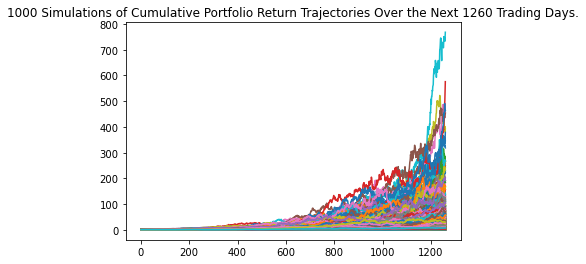

In [16]:
small_line = MC_small.plot_simulation()

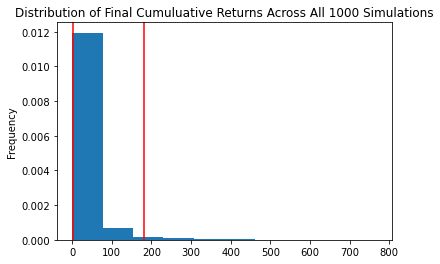

In [17]:
# Simulation outcomes
small_plot = MC_small.plot_distribution()

In [18]:
# Fetch sumary statistics
small_summ = MC_small.summarize_cumulative_return()
print(small_summ)

count           1000.000000
mean              31.907965
std               57.605540
min                0.221468
25%                7.015289
50%               15.065654
75%               31.898018
max              767.887020
95% CI Lower       1.383104
95% CI Upper     180.870668
Name: 1260, dtype: float64


In [67]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in stocks
lower_small = round(small_summ[8]*10000,2)
upper_small = round(small_summ[9]*10000,2)

# Print results
output_crypto_msg = f"There is a 95% chance that an initial investment of $10,000 in a portfolio of these cryptocurrencies over the next 5 years will end within in the range of ${lower_small} and ${upper_small}."
output_crypto_msg

'There is a 95% chance that an initial investment of $10,000 in a portfolio of these cryptocurrencies over the next 5 years will end within in the range of $13831.04 and $1808706.68.'

In [20]:
# Daily returns already calculated previously
daily_returns = crypto_all.pct_change()
daily_returns = daily_returns.dropna()

# Calculate annualized volatility of stocks
volatility = daily_returns.std() * np.sqrt(252)
volatility.sort_values(inplace=True)

The most volatile stocks you could purchase would be Litecoin, Dash, and Monero


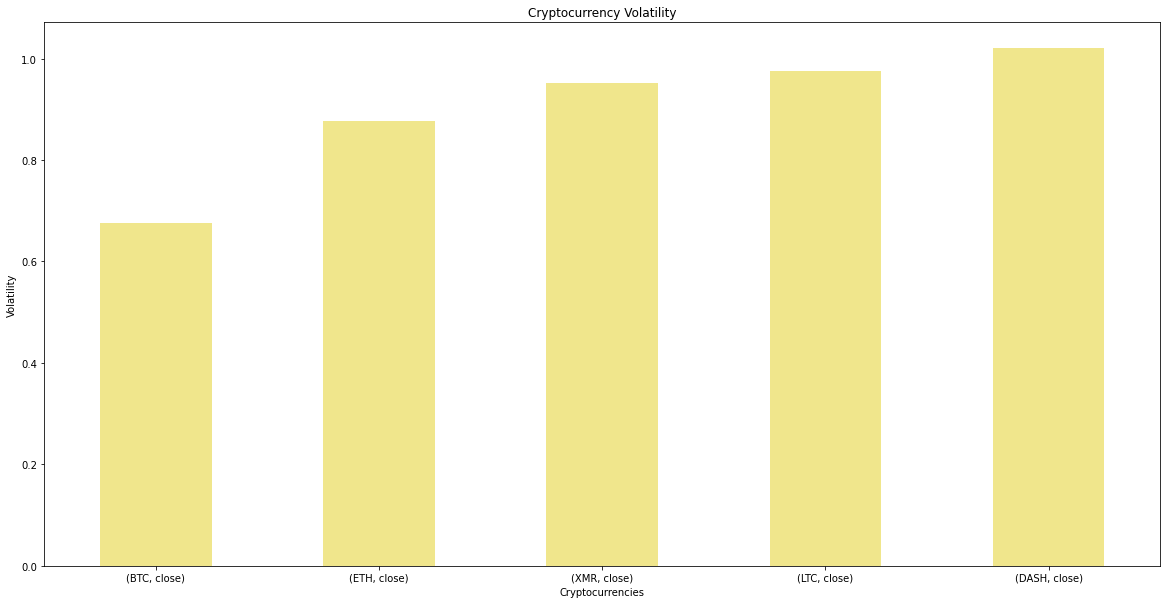

In [21]:
volatility_plot = volatility.plot(kind='bar',figsize=(20,10), title = "Cryptocurrency Volatility", xlabel="Cryptocurrencies", ylabel= "Volatility", color="khaki", rot = 0)
print("The most volatile stocks you could purchase would be Litecoin, Dash, and Monero")

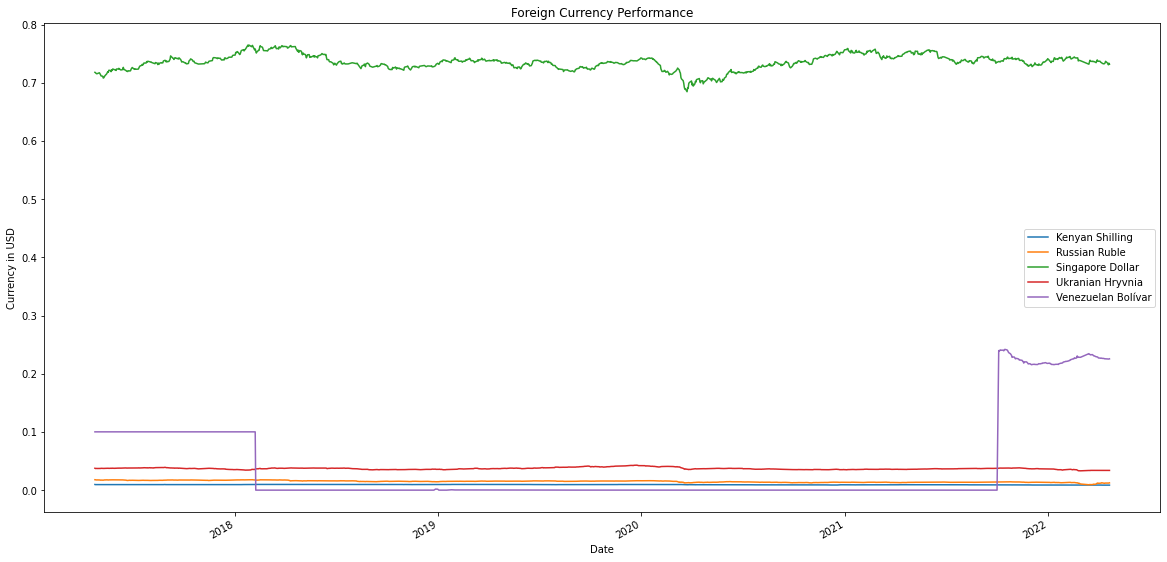

In [22]:
Countries = Countries_currencies.plot(figsize=(20,10), xlabel = "Date", ylabel = "Currency in USD", title = "Foreign Currency Performance")
Countries.legend(['Kenyan Shilling', 'Russian Ruble', 'Singapore Dollar', 'Ukranian Hryvnia', 'Venezuelan Bolívar'])

#All currencies

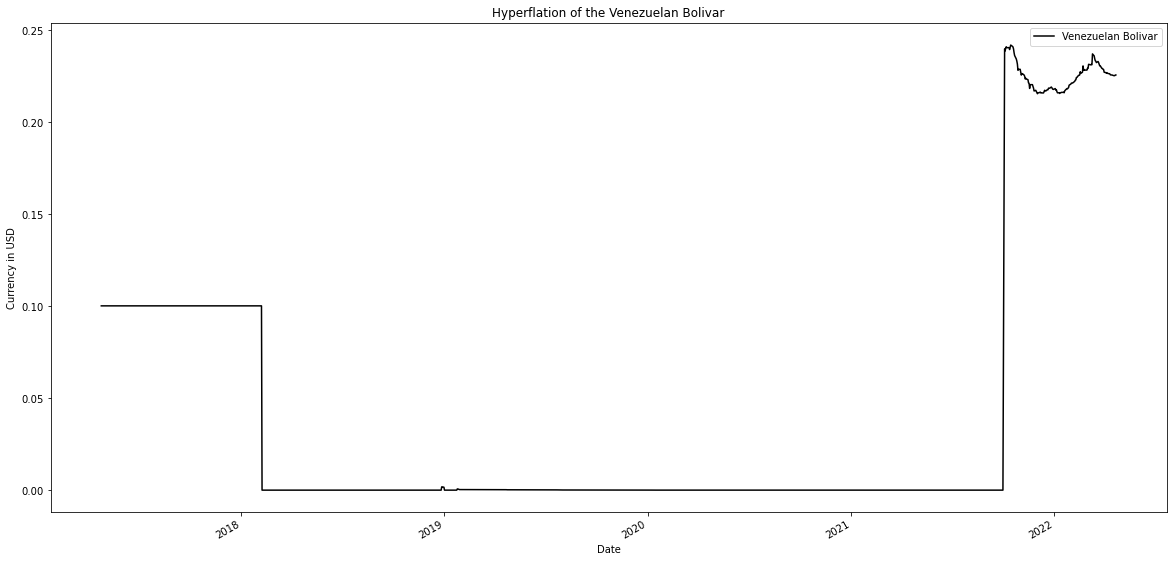

In [23]:
Venplot = Venezuela.plot(color = "Black", kind='line', xlabel = "Date", ylabel = "Currency in USD", figsize=(20,10), title = "Hyperflation of the Venezuelan Bolivar")
Venplot.legend(['Venezuelan Bolivar'])

#Venezuela only

<AxesSubplot:title={'center':'2022 Russian invasion of Ukraine'}, xlabel='Date', ylabel='Currency in USD'>

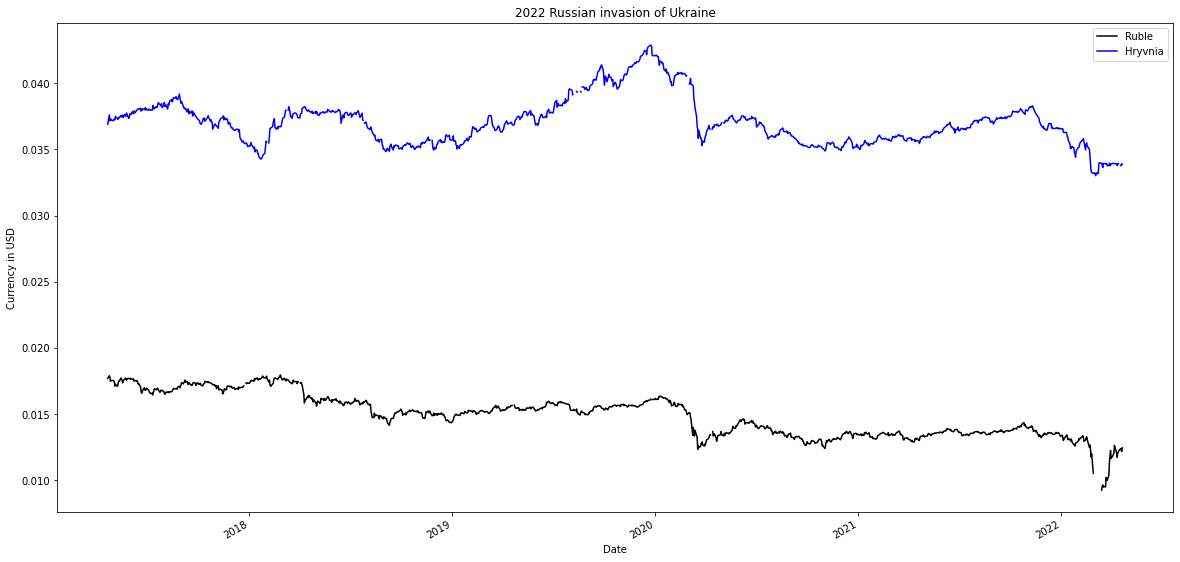

In [24]:
Russia_Ukr = pd.concat([Russia, Ukraine], axis=1)
Russia_Ukr.dropna()
columns = ['Ruble', 'Hryvnia']
Russia_Ukr.columns = columns
Russia_Ukr.plot(figsize=(20,10), xlabel = "Date", ylabel = "Currency in USD", title = "2022 Russian invasion of Ukraine", color =("black","blue"))

#russia/ukraine only

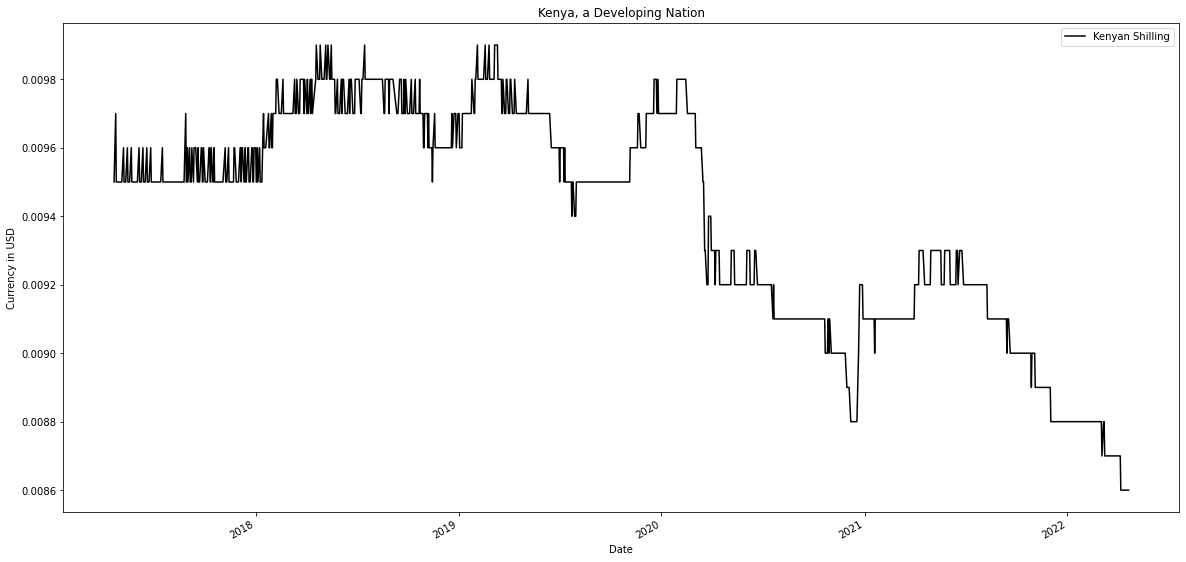

In [25]:
Kenyaplot = Kenya.plot(figsize=(20,10), xlabel = "Date", ylabel = "Currency in USD", title = "Kenya, a Developing Nation", color = 'black')
Kenyaplot.legend(['Kenyan Shilling'])

#Kenya only

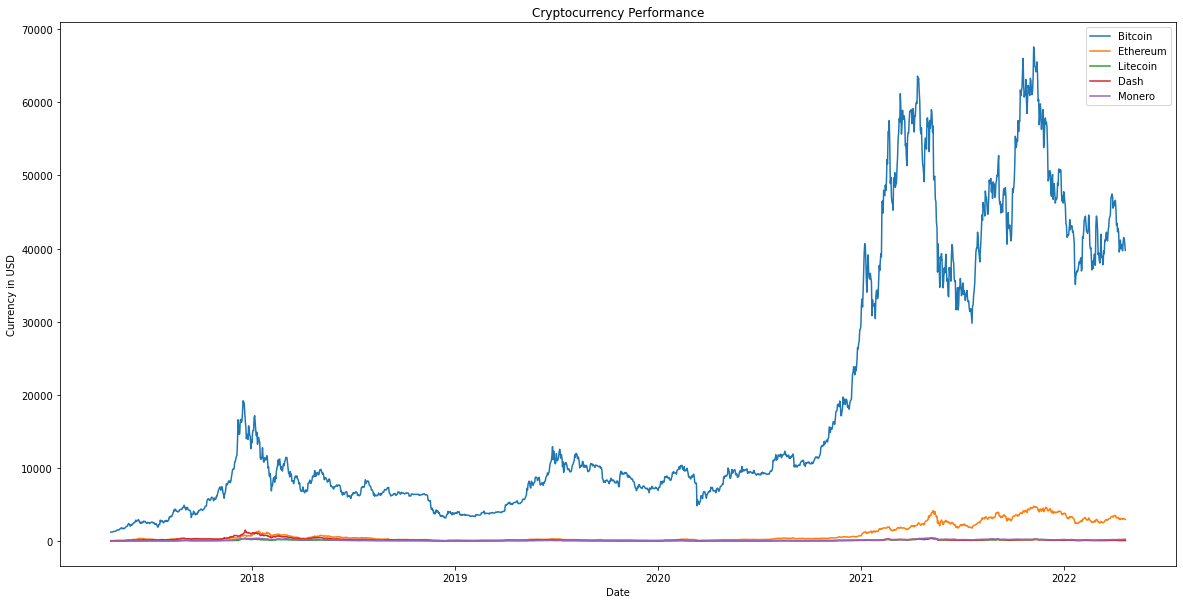

In [26]:
crypto_plot = crypto_all.plot(figsize=(20,10), xlabel = "Date", ylabel = "Currency in USD", title = "Cryptocurrency Performance")
crypto_plot.legend(['Bitcoin', 'Ethereum', 'Litecoin', 'Dash', 'Monero'])

#General Overview

In [27]:
crypto_no_bitcoin = pd.concat([eth, ltc, dash, xmr], axis=1, keys=["ETH", "LTC", "DASH", "XMR"])
crypto_no_bitcoin_dates = crypto_no_bitcoin[~(crypto_no_bitcoin.index < '2017-04-21')] 

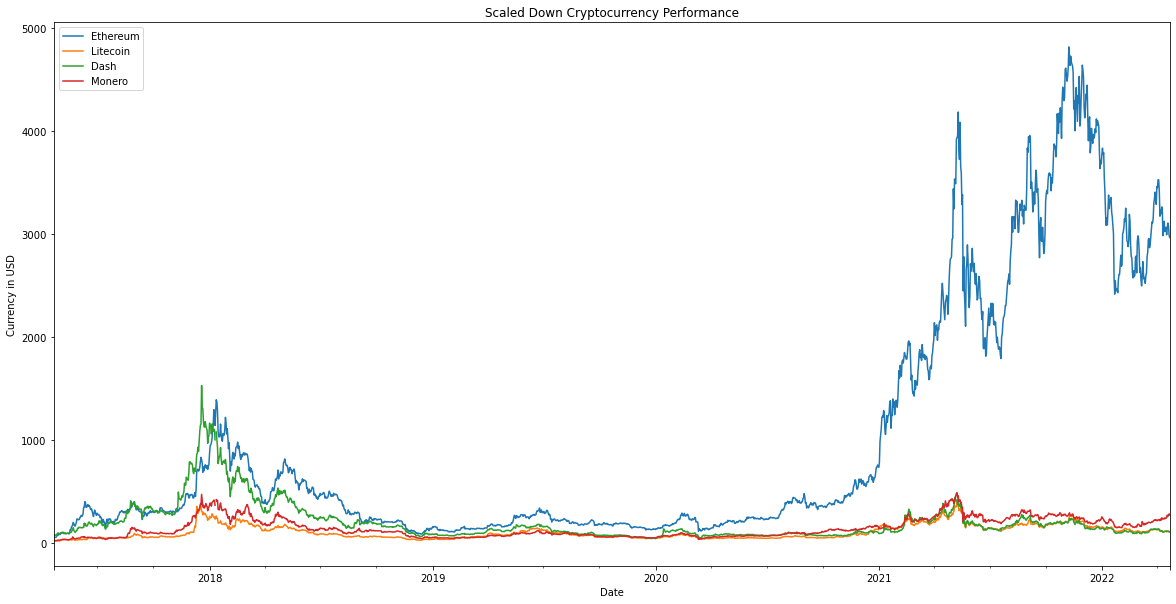

In [28]:
crypto_no_bitcoin_dates_plot = crypto_no_bitcoin_dates.plot(figsize=(20,10), xlabel = "Date", ylabel = "Currency in USD", title = "Scaled Down Cryptocurrency Performance")
crypto_no_bitcoin_dates_plot.legend(['Ethereum', 'Litecoin', 'Dash', 'Monero'])


#Can explain that Dash was as popular as Ethereum during their early days; however Ethereum exploded with NFTs

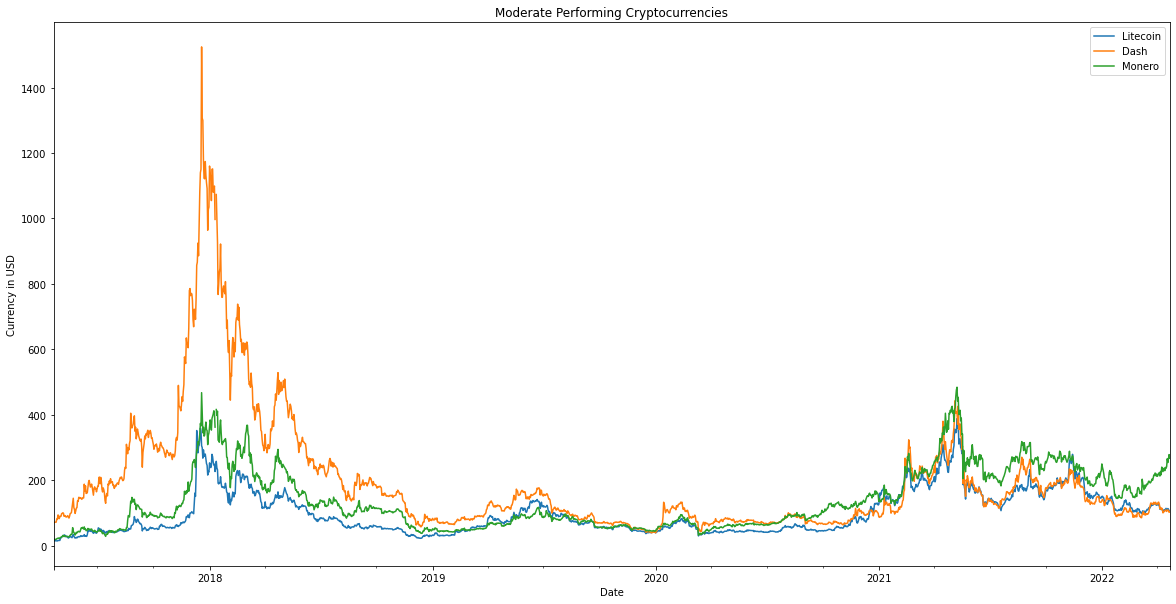

In [29]:
crypto_just_3_lowest = pd.concat([ltc, dash, xmr], axis=1, keys=["LTC", "DASH", "XMR"])
crypto_just_3_lowest_dates = crypto_just_3_lowest[~(crypto_just_3_lowest.index < '2017-04-21')] 
crypto_just_3_lowest_dates_plot = crypto_just_3_lowest_dates.plot(figsize=(20,10), xlabel = "Date", ylabel = "Currency in USD", title = "Moderate Performing Cryptocurrencies")
crypto_just_3_lowest_dates_plot.legend(['Litecoin', 'Dash', 'Monero'])

#can use side by side with 3 developing to show how much more volatility

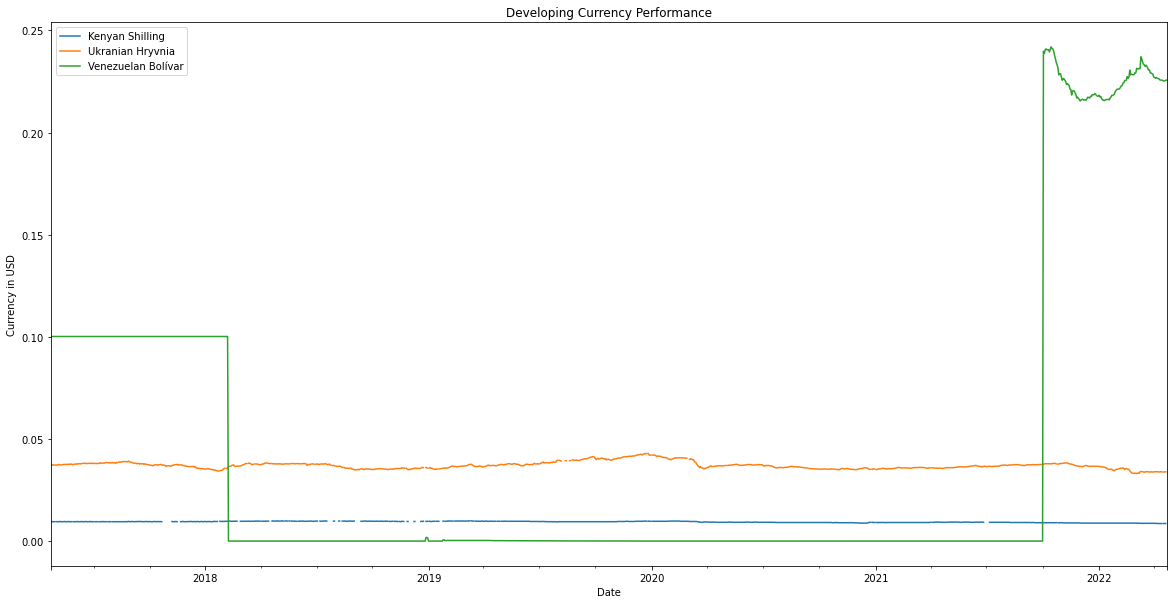

In [30]:
developing = pd.concat([Kenya, Ukraine, Venezuela], axis=1, keys=["KES", "UAH", "VES"])
Countries_currencies_clean = developing[~(developing.index < '2017-04-21')] 
Countries_currencies_plot = Countries_currencies_clean.plot(figsize=(20,10), xlabel = "Date", ylabel = "Currency in USD", title = "Developing Currency Performance")
Countries_currencies_plot.legend(['Kenyan Shilling', 'Ukranian Hryvnia', 'Venezuelan Bolívar'])

#can use side by side with 3 crypto to show how little change is seen with these currencies

Text(4, 8.52, '8.52%')

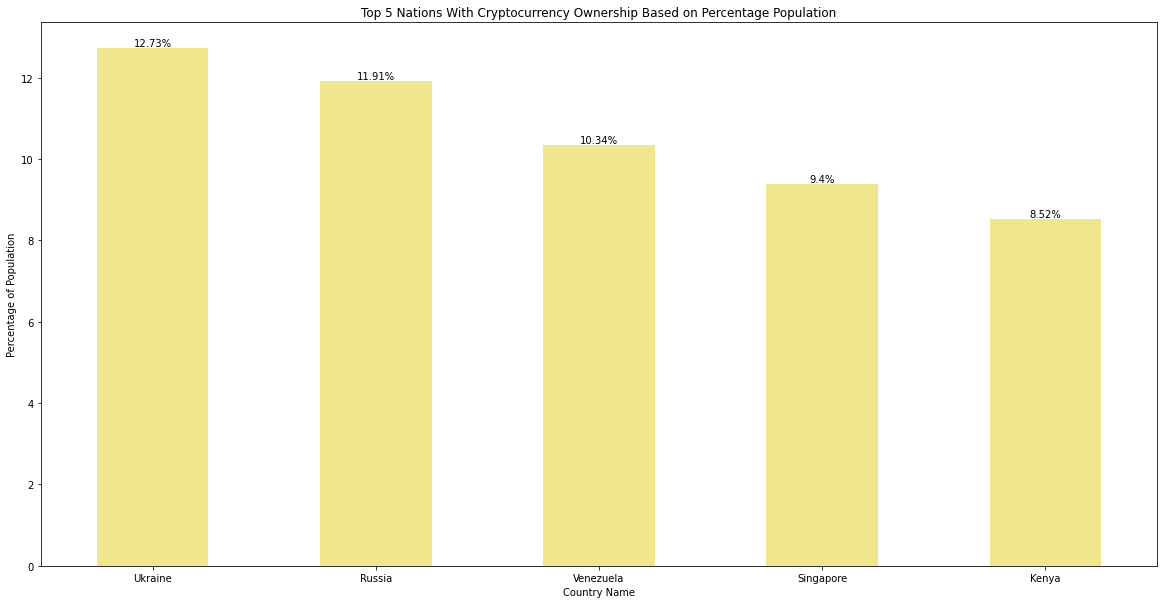

In [31]:
df = pd.read_csv("World Usage.csv").drop_duplicates()
data_to_plot = df[["Country", "Percentage of population", "Latitude", "Longitude"]]
df.index = df['Country']

y=df['Percentage of population']
bar = df['Percentage of population'].nlargest(n=5).plot(color = "khaki", kind='bar', xlabel = "Country Name", ylabel = "Percentage of Population", figsize=(20,10), title = "Top 5 Nations With Cryptocurrency Ownership Based on Percentage Population", rot='horizontal')
bar.text(0,y[0],"12.73%",ha="center",va="bottom")
bar.text(1,y[1],"11.91%",ha="center",va="bottom")
bar.text(2,y[2],"10.34%",ha="center",va="bottom")
bar.text(3,y[3],"9.4%",ha="center",va="bottom")
bar.text(4,y[4],"8.52%",ha="center",va="bottom")


In [32]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")

# Set the Mapbox API
px.set_mapbox_access_token(map_box_api)

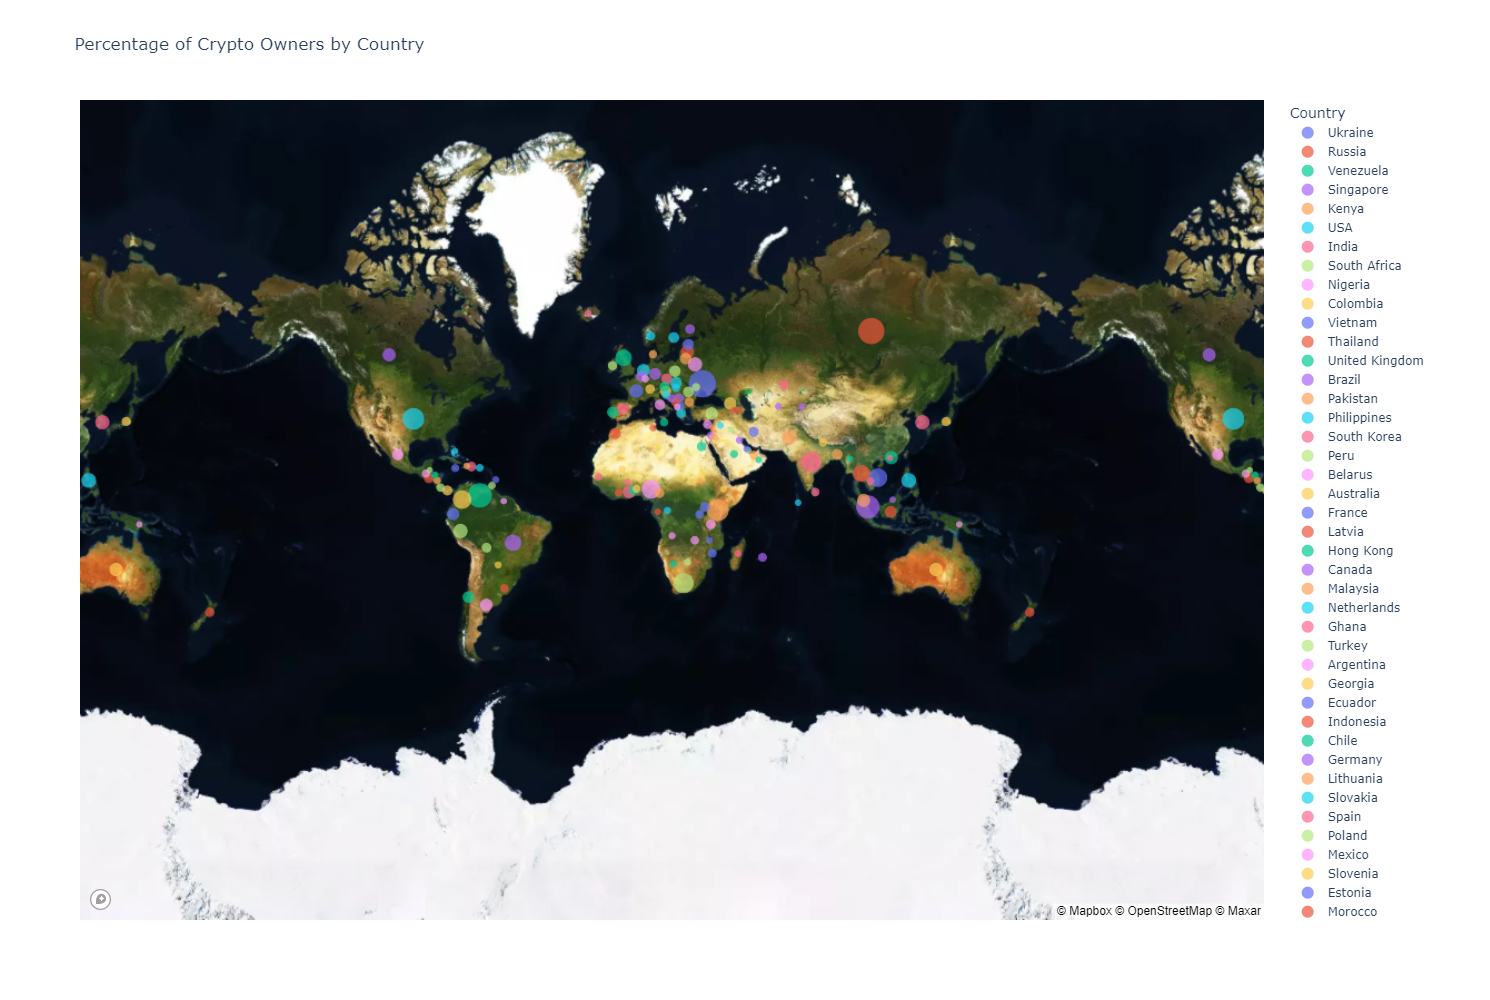

In [88]:
# Plot Data
map_plot = px.scatter_mapbox(
    data_to_plot,
    lat="Latitude",
    lon="Longitude",
    size="Percentage of population",
    color="Country",
    zoom=0.2,
    mapbox_style = 'satellite',
    height = 1000,
    width = 1000,
    title = "Percentage of Crypto Owners by Country"
)

# Display the map
map_final = map_plot.show()
map_final

,"(KES, close)","(RUB, close)","(SGD, close)","(UAH, close)","(VES, close)",close
"(KES, close)",1.000000,0.763211,-0.023970,0.440310,-0.487676,0.113089
"(RUB, close)",0.763211,1.000000,0.092565,0.468804,-0.092174,-0.035514
"(SGD, close)",-0.023970,0.092565,1.000000,-0.180958,0.049584,-0.796612
"(UAH, close)",0.440310,0.468804,-0.180958,1.000000,-0.196009,0.331953
"(VES, close)",-0.487676,-0.092174,0.049584,-0.196009,1.000000,0.106762
close,0.113089,-0.035514,-0.796612,0.331953,0.106762,1.000000


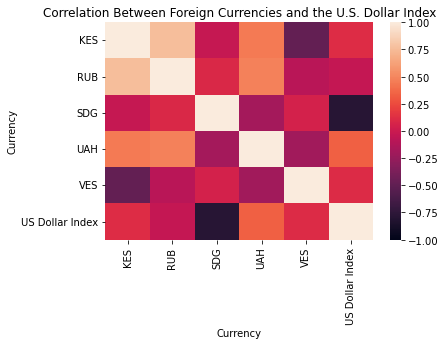

In [34]:
dollar.index = pd.to_datetime(dollar.index, utc=True) 
Countries_currencies.index = pd.to_datetime(Countries_currencies.index, utc=True)
country_usd = pd.concat([Countries_currencies,dollar], axis=1)
country_usd.dropna()
country_usd_corr = country_usd.corr()
x_labels = ['KES', 'RUB', 'SDG', 'UAH', 'VES', 'US Dollar Index']
country_heatmap = sns.heatmap(country_usd_corr, vmin=-1, vmax=1, xticklabels = x_labels, yticklabels = x_labels)
country_heatmap.set_title('Correlation Between Foreign Currencies and the U.S. Dollar Index')
country_heatmap.set_xlabel('Currency')
country_heatmap.set_ylabel('Currency')


country_usd_corr
#can explain how russia and ukraine have been correlated (2nd box of KES) or how Kenya is somehow a little correlated, idk

Text(32.99999999999999, 0.5, 'Currency')

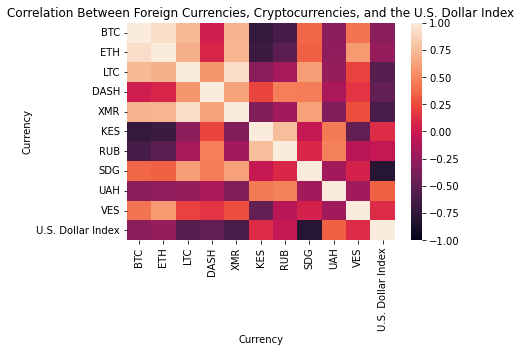

In [36]:
crypto_all.index = pd.to_datetime(crypto_all.index, utc=True) 
dollar.index = pd.to_datetime(dollar.index, utc=True) 
Countries_currencies.index = pd.to_datetime(Countries_currencies.index, utc=True)
crypto_Countries_index = pd.concat([crypto_all,Countries_currencies, dollar], axis=1)
crypto_Countries_index.dropna()
all_correlation_index = crypto_Countries_index.corr()
x_labels_for_index = ['BTC','ETH','LTC','DASH','XMR','KES', 'RUB', 'SDG', 'UAH', 'VES', 'U.S. Dollar Index']
all_currency_map_index = sns.heatmap(all_correlation_index, vmin=-1, vmax=1, xticklabels = x_labels_for_index, yticklabels = x_labels_for_index)
all_currency_map_index.set_title('Correlation Between Foreign Currencies, Cryptocurrencies, and the U.S. Dollar Index')
all_currency_map_index.set_xlabel('Currency')
all_currency_map_index.set_ylabel('Currency')
#idk what to do with this, maybe that btc and eth are related to sp500 

Text(33.0, 0.5, 'Currency')

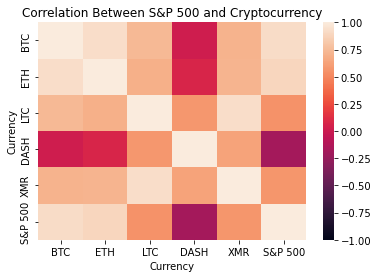

In [37]:
crypto_all.index = pd.to_datetime(crypto_all.index, utc=True) 
sp500.index = pd.to_datetime(sp500.index, utc=True) 
crypto_sp500 = pd.concat([crypto_all,sp500], axis=1)
crypto_sp500.dropna()
all_correlation = crypto_sp500.corr()
x_labels_for_all = ['BTC','ETH','LTC','DASH','XMR','S&P 500']
crypto_sp500_map = sns.heatmap(all_correlation, vmin=-1, vmax=1, xticklabels = x_labels_for_all, yticklabels = x_labels_for_all)
crypto_sp500_map.set_title('Correlation Between S&P 500 and Cryptocurrency')
crypto_sp500_map.set_xlabel('Currency')
crypto_sp500_map.set_ylabel('Currency')


#idk what to do with this

Tabs
    [0] Row
        [0] PNG(PngImageFile)
        [1] Markdown(str)
    [1] Row
        [0] PNG(PngImageFile)
        [1] Markdown(str)
    [2] Row
        [0] PNG(PngImageFile)
        [1] Markdown(str)
    [3] PNG(PngImageFile, name='Correlation b...)
    [4] PNG(PngImageFile, name='Correlation b...)
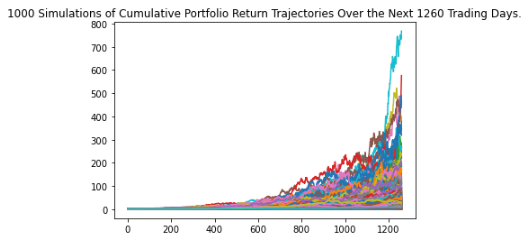
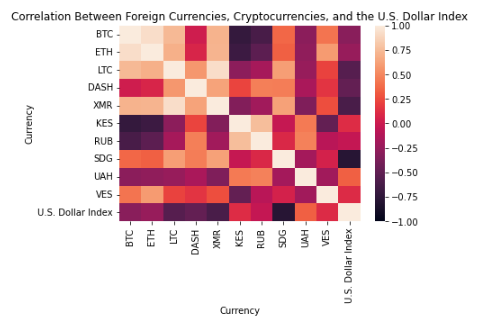
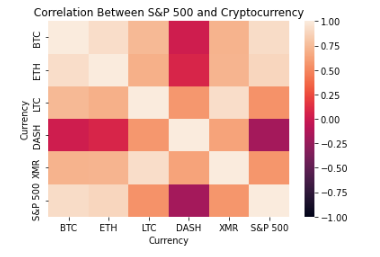
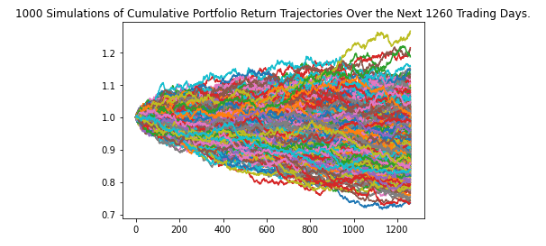
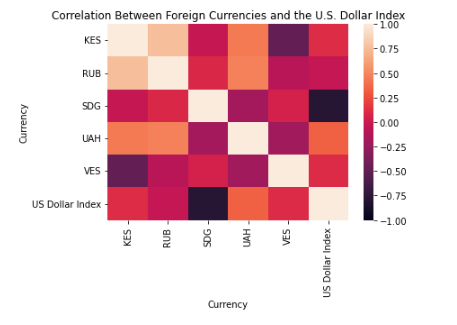

In [90]:
#import images

foreign_monte_img = requests.get('https://i.gyazo.com/8e86dc3887d4e5c6e49c71228357a220.png')
foreign_img = Image.open(BytesIO(foreign_monte_img.content))
foreign_print = output_foreign_msg
foreign_rows = pn.Row(foreign_img, foreign_print)

crypto_monte_img = requests.get('https://i.gyazo.com/93b0ad1f5f52dc9978c8691db482b097.png')
crypto_img = Image.open(BytesIO(crypto_monte_img.content))
crypto_print = output_crypto_msg
crypto_rows = pn.Row(crypto_img, crypto_print)

country_heatmap_img = requests.get('https://i.gyazo.com/2dea056ef734a2c78c7f3ef5a91f1fd9.png')
country_heatmap_imgfinal = Image.open(BytesIO(country_heatmap_img.content))
country_heatmap_text = "We see that the U.S. Dollar Index, determined by other foreign major currencies, is strongly negatively correlated with the Singapore Dollar. When the U.S. Dollar Index appreciates, the Singapore Dollar is expected to depreciate, and vice verca."
country_heatmap_rows = pn.Row(country_heatmap_imgfinal, country_heatmap_text)

crypto_sp500_map_img = requests.get('https://i.gyazo.com/85031d40549fd3bd9a3e3534938ad13b.png')
crypto_sp500_map_imgfinal = Image.open(BytesIO(crypto_sp500_map_img.content))
crypto_sp500_map_text = "We see that the S&P 500, an index of major American companies, is strongly positively correlated with Bitcoin. When the value of Bitcoin appreciates, the S&P 500 is expected to appreciate, and vice verca."
crypto_sp500_map_rows = pn.Row(crypto_sp500_map_imgfinal, crypto_sp500_map_text)


all_currency_map_index_img = requests.get('https://i.gyazo.com/fce34dc3378dce0e5702749880825467.png')
all_currency_map_index_imgfinal = Image.open(BytesIO(all_currency_map_index_img.content))
all_currency_map_index_text = "We see that the Kenyan Shilling is strongly negatively correlated with Bitcoin. When the value of Bitcoin appreciates, the Kenyan Shilling is expected to depreciate, and vice verca."
all_currency_map_index_rows = pn.Row(all_currency_map_index_imgfinal, all_currency_map_index_text)

tabs=pn.Tabs(
("Foreign Monte Carlo", foreign_rows),
("Crypto Monte Carlo", crypto_rows),
("Correlation between foreign currencies and U.S. Dollar Index", country_heatmap_rows),
("Correlation between cryptocurrencies and S&P 500", crypto_sp500_map_imgfinal),
("Correlation between all currencies and U.S. Dollar Index", all_currency_map_index_imgfinal)
)

tabs